<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 δείγματα του φυτού <i>Ίρις</i> με βάση τα δεδομένα που σας δίνονται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε δείγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο σύνολο δεδομένων του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε τον βέλτιστο αριθμό των <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση το βέλτιστο αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πως λειτουργεί ο αλγόριθμος.</li>
<li>Να σχεδιάσετε τις πραγματικές κλάσεις, καθώς και τις κλάσεις που προκύπτουν από το μοντέλο <i>k-means</i>. Τι παρατηρείτε;</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>). Αναλύστε τα
αποτελέσματα. Πριν υλοποιήσετε τους ελέγχους, να λάβετε υπόψη το γεγονός ότι οι
αριθμοί που χρησιμοποιούνται στο <i>iris.target</i> για τα είδη του φυτού, δεν έχουν καμία σχέση με τους αριθμούς που χρησιμοποιούνται από το μοντέλο <i>k-means</i> για τον ορισμό των <i>clusters</i>.</li>
</ul>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [3]:
from kneed import KneeLocator

In [4]:
# import some data to play with (from sklearn)
iris = datasets.load_iris()

In [0]:
# #print is optional
# print(iris.data)
# iris.feature_names
# print(iris.target)
# iris.target_names

In [5]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [6]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

## Elbow Method

In [7]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

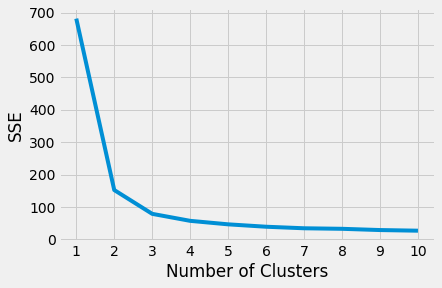

In [8]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Εφόσον βλέπουμε ότι έχουμε elbow στο n=2 και n=3 clusters, διαλέγουμε το μεγαλύτερο.
Εκτός από την εύρεση του elbow με το μάτι, μπορούμε να φέρουμε και την συνάρτηση Knee Locator.

In [9]:
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

Optimum Number of Clusters is 3

In [10]:
X = x.copy()

In [11]:
kmeans = KMeans(init="random",
    n_clusters=3,
    n_init=100,
    max_iter=500,
    random_state=77
)
y_pred = kmeans.fit_predict(X)

Εφόσον τα δεδομένα μας έχουν διάσταση 4, δηλαδή 4 μεταβλητές, δεν μπορούμε να σχεδιάσουμε και τις 4 μεταβλητές ταυτόχρονα, εκτός αν εφαρμόσουμε PCA. Εφόσον κάτι τέτοιο δεν ζητείται, κάνουμε δύο διαγράμματα για τα predicted & actual clusters, για κάθε ζευγάρι μεταβλητών.

Text(0.5, 1.0, 'Correct Clusters')

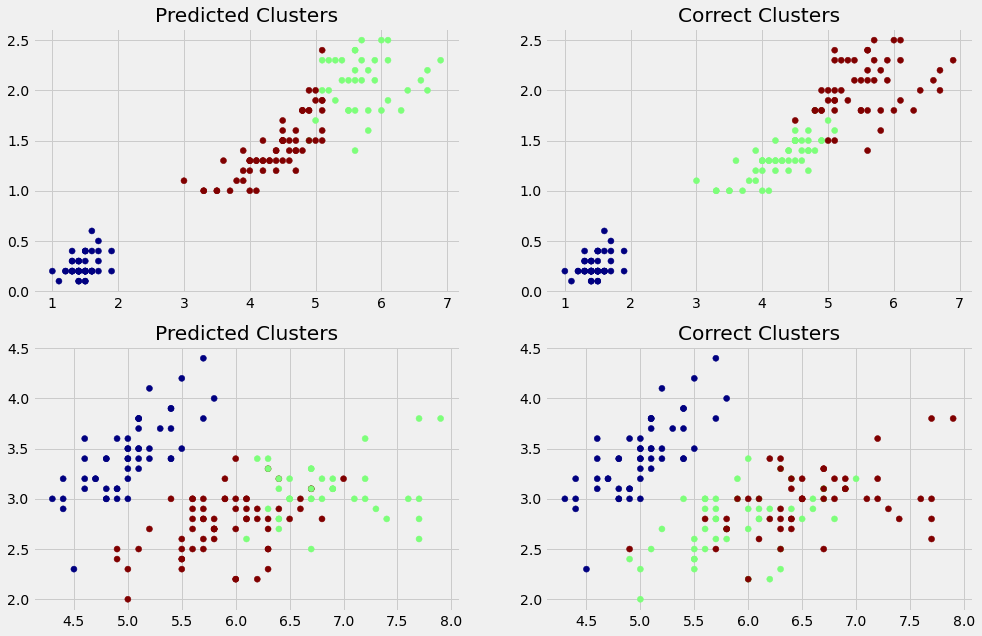

In [12]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
plt.style.use("fivethirtyeight")
ax[0][0].scatter(X.Petal_Length,X.Petal_Width, c=y_pred,cmap='jet')
ax[0][0].set_title('Predicted Clusters')
ax[0][1].scatter(X.Petal_Length,X.Petal_Width, c=y.Targets,cmap='jet')
ax[0][1].set_title('Correct Clusters')

ax[1][0].scatter(X.Sepal_Length,X.Sepal_Width, c=y_pred,cmap='jet')
ax[1][0].set_title('Predicted Clusters')
ax[1][1].scatter(X.Sepal_Length,X.Sepal_Width, c=y.Targets,cmap='jet')
ax[1][1].set_title('Correct Clusters')

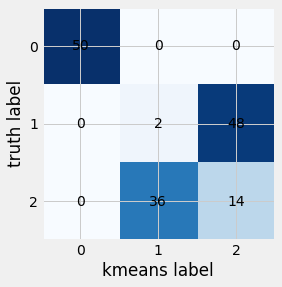

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.yticks([0,1,2])
plt.show()

### ΠΡΟΣΟΧΗ:

ο prediction από τον kmeans μπορεί να προβλέψει σωστά τις συστάδες αλλά να τις αντιστοιχήσει διαφορετικά από ότι το y.target. Αυτό είναι αναμενόμενο καθώς χρησιμοποιούμε μέθοδο unsupervised learning, δηλαδή τα labels δεν τα γνωρίζουμε εκ των προτέρων. Ένας confusion matrix δεν έχει νόημα καθώς και να γνωρίζουμε τα labels (όπως συμβαίνει τώρα) δεν υπάρχει αντιστοιχία ένα προς ένα μεταξύ των predicted και true labels. Παρ'όλα αυτά, αυτό που μπορούμε να κάνουμε και ας είναι κάπως ανορθόδοξο, είναι να πειράξουμε το random_state έτσι ώστε στο διάγραμμα τα predicted με τα true labels να ταυτίζονται (το $0_{predicted}$ με το $0_{actual}$ κ.ο.κ.), έτσι, ο confusion matrix έχει υπόσταση, δηλαδή μας δείχνει ποια σημεία έβαλε σε λάθος clusters και ποια όχι, όμως και πάλι ξαναλέμε πως **σε ένα πραγματικό σενάριο ενός unsupervised learning προβλήματος δεν γνωρίζουμε τα labels επομένως ένας confusion matrix δεν έχει φυσικό νόημα.**